# Задание 3 Вариант 8 

In [1]:
import numpy as np
import math
import random
import scipy
from scipy import optimize
from scipy import integrate
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
def get_values(n, generator):
    values=[]
    for i in range(n):
        values.append(next(generator))
    return values

In [3]:
n=1000

### Колмагоров

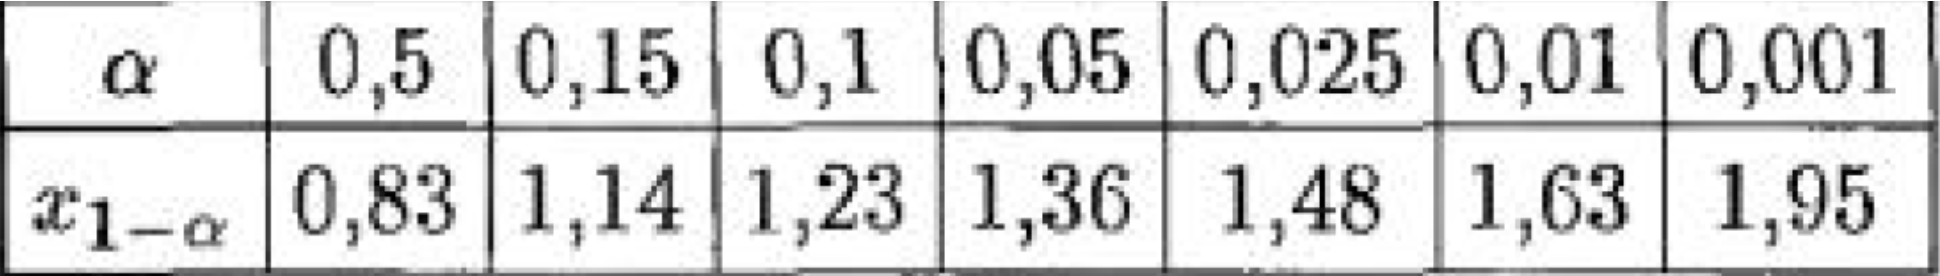

In [4]:
def kolm_dist(values):
    max_val=scipy.optimize.fmin(lambda x: -abs_dist_diff(x,values), 0,disp=False)[0]
    return abs_dist_diff(max_val,values)

In [5]:
def abs_dist_diff(x,values):
    return abs(emp_dist_func(x,values)-teor_dist_func(x))

In [6]:
def kolm_check_hypothesis(delta,Dsqrt):
    print('Dn*sqrt(n): {}, Delta: {}'.format(Dsqrt,delta))
    if(Dsqrt<delta):
        return True
    else:
        return False

In [7]:
def emp_dist_func(x, values):
    n=len(values)
    res_sum=0
    for value in values:
        if(value<=x):
            res_sum+=1
    return res_sum/n

### Пирсон

In [8]:
def get_chi_squared(a_min, a_plus,values,l):
    n=len(values)
    vs=get_freqs(a_min, a_plus,values,l)
    interval=(a_plus-a_min)/l
    res_sum=0
    for k in range(1,l):
        pk=teor_dist_func(a_min+interval*(k))-teor_dist_func(a_min+interval*(k-1))
        vk=vs[k-1]
        res_sum+=math.pow(vk-n*pk,2)/(n*pk)
    return res_sum

In [9]:
def chi_check_hypothesis(G,chi_sqared):
    print('X^2: {}, G-1: {}'.format(chi_sqared,G))
    if(chi_sqared<G):
        return True
    else:
        return False

In [10]:
def get_freqs(a_min, a_plus, values, l):
    freqs=[0 for i in range(l)]
    interval=(a_plus-a_min)/l
    for value in values:
        if(value>=a_min and value<=a_plus):
            freqs[math.floor((value-a_min)/interval)]+=1
    return freqs

# Multiplicative Congruential Generator

In [11]:
def random_MCG(a,b,m):
    while True:
        a=(b*a)%m
        yield a/m

In [12]:
a1=262147
b1=262147
a2=131075
b2=131075
m=math.pow(2,31)

In [13]:
MCG1=random_MCG(a1,b1,m)
MCG2=random_MCG(a2,b2,m)

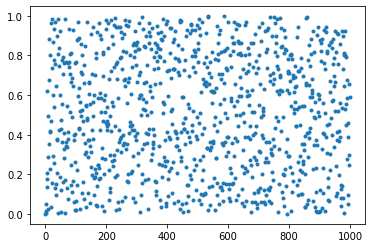

In [14]:
values_MCG1=get_values(n,MCG1)
plt.plot([i for i in range(n)],values_MCG1,'.')

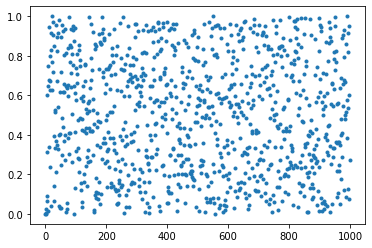

In [15]:
values_MCG2=get_values(n,MCG2)
plt.plot([i for i in range(n)],values_MCG2,'.')

# Normal Distribution

In [16]:
me=-5
std=5

In [17]:
def random_ND(MCG1,MCG2,me,std):
    while True:
        mcg1=get_values(1,MCG1)[0]
        mcg2=get_values(1,MCG2)[0]
        nd=math.sqrt(-2*math.log(mcg1))*math.cos(2*math.pi*mcg2)
        yield me+std*nd

In [18]:
ND=random_ND(MCG1,MCG2,me,std)

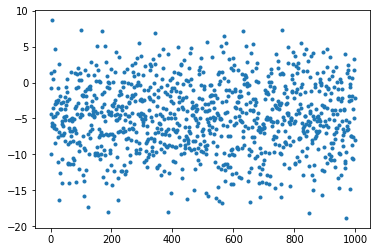

In [19]:
values_ND=get_values(n,ND)
plt.plot([i for i in range(n)],values_ND,'.')

https://homepage.divms.uiowa.edu/~mbognar/applets/normal.html

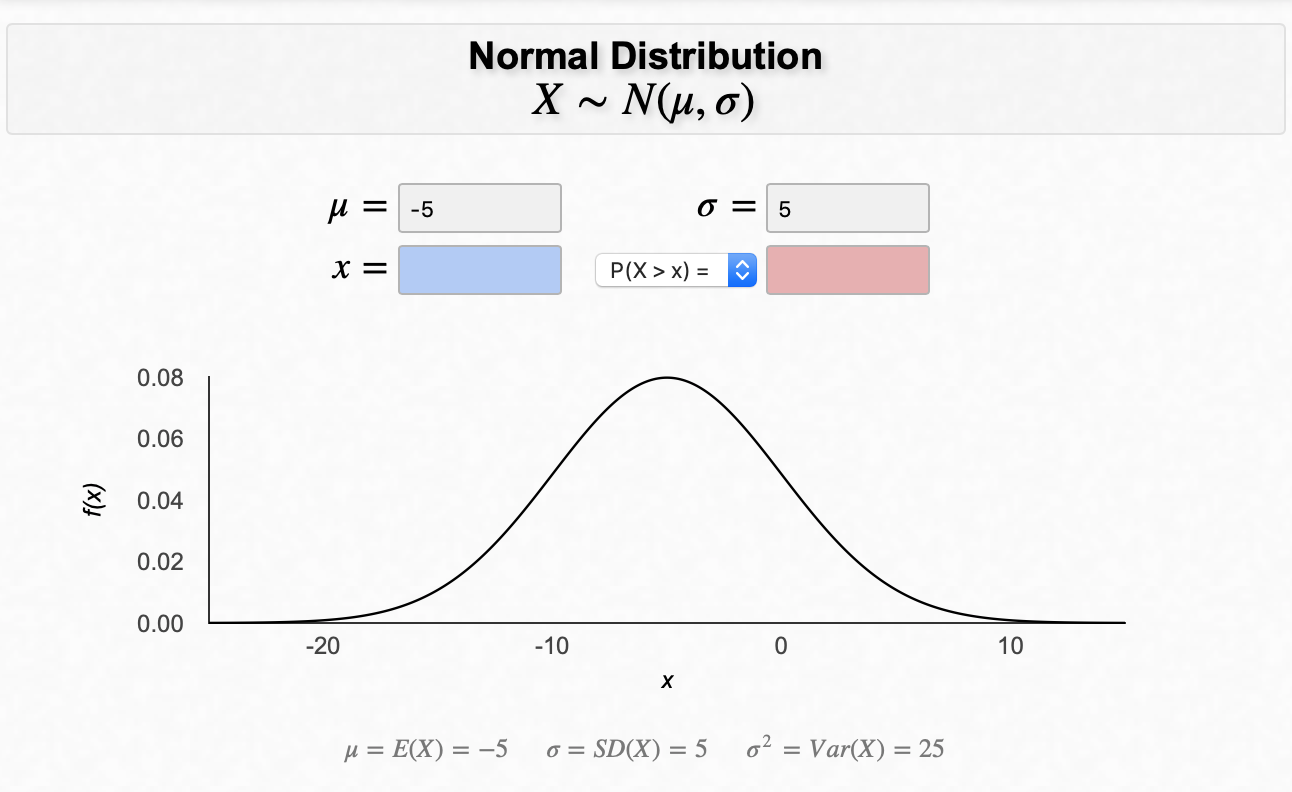

# Несмещенные оценки

In [20]:
sample_mean=sum(values_ND)/n
sample_mean

-4.835965383051406

In [21]:
sample_cov=sum([math.pow(value-sample_mean,2) for value in values_ND])/n
sample_cov

23.618554946502517

# Критерии согласия

In [22]:
a_min=-15
a_plus=5

## Колмогорова

http://www.machinelearning.ru/wiki/index.php?title=Нормальное_распределение

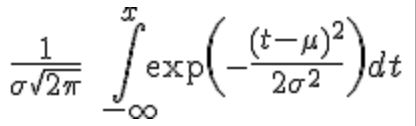

In [23]:
delta=1.36
me=-5
std=5

In [24]:
def teor_prob_func(x):
    den=(std*math.sqrt(2*math.pi))
    num=math.exp(-math.pow((x-me)/std,2)/2)
    return num/den

def teor_dist_func(x):
    return integrate.quad(lambda t: teor_prob_func(t), -np.inf, x)[0]

In [25]:
kolm_check_hypothesis(delta,kolm_dist(values_ND)*math.sqrt(n))

Dn*sqrt(n): 0.39006038072477683, Delta: 1.36


True

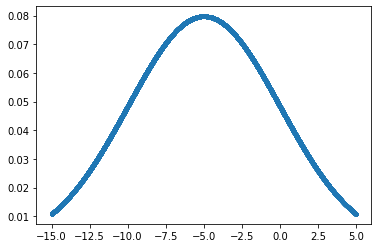

In [26]:
plt.plot([i/n for i in range(a_min*n,a_plus*n)],[teor_prob_func(i/n) for i in range(a_min*n,a_plus*n)],'.')

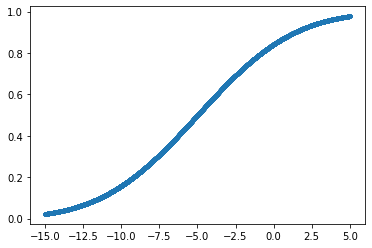

In [27]:
plt.plot([i/n for i in range(a_min*n,a_plus*n)],[teor_dist_func(i/n) for i in range(a_min*n,a_plus*n)],'.')

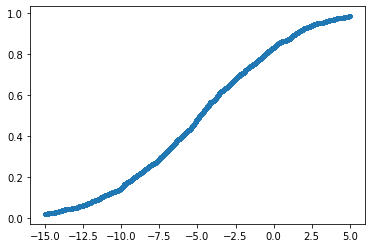

In [28]:
plt.plot([i/n for i in range(a_min*n,a_plus*n)],[emp_dist_func(i/n,values_ND) for i in range(a_min*n,a_plus*n)],'.')

# Покажем, что ошибка первого рода стремится к 0

In [29]:
t=1000

In [30]:
sum_fail_bd=0
for i in range(t):
    values=get_values(n,ND)
    if(kolm_check_hypothesis(delta,kolm_dist(values)*math.sqrt(n))==False):
        sum_fail_bd+=1

Dn*sqrt(n): 0.1472179962072097, Delta: 1.36
Dn*sqrt(n): 0.2712124180959565, Delta: 1.36
Dn*sqrt(n): 0.08397244300384207, Delta: 1.36
Dn*sqrt(n): 0.05647637165576672, Delta: 1.36
Dn*sqrt(n): 0.40038556495730043, Delta: 1.36
Dn*sqrt(n): 0.6121818200800806, Delta: 1.36
Dn*sqrt(n): 0.5188395789584574, Delta: 1.36
Dn*sqrt(n): 0.3770946202029067, Delta: 1.36
Dn*sqrt(n): 0.09608959366102787, Delta: 1.36
Dn*sqrt(n): 0.20099548352057714, Delta: 1.36
Dn*sqrt(n): 0.1993111309636168, Delta: 1.36
Dn*sqrt(n): 0.14311209032630426, Delta: 1.36
Dn*sqrt(n): 0.22347670160910607, Delta: 1.36
Dn*sqrt(n): 0.19549556546159555, Delta: 1.36
Dn*sqrt(n): 0.5031956675640072, Delta: 1.36
Dn*sqrt(n): 0.04768781700098496, Delta: 1.36
Dn*sqrt(n): 0.5034841918289057, Delta: 1.36
Dn*sqrt(n): 0.17261998893371186, Delta: 1.36
Dn*sqrt(n): 0.2420110720171027, Delta: 1.36
Dn*sqrt(n): 0.5643500135831052, Delta: 1.36
Dn*sqrt(n): 0.06440477910640939, Delta: 1.36
Dn*sqrt(n): 0.2875678110631201, Delta: 1.36
Dn*sqrt(n): 0.1928120

Dn*sqrt(n): 0.026461940380642538, Delta: 1.36
Dn*sqrt(n): 0.5268834015586643, Delta: 1.36
Dn*sqrt(n): 0.22251866211482849, Delta: 1.36
Dn*sqrt(n): 0.20063079853349605, Delta: 1.36
Dn*sqrt(n): 0.23701664193836183, Delta: 1.36
Dn*sqrt(n): 0.273703161505238, Delta: 1.36
Dn*sqrt(n): 0.5272592798017847, Delta: 1.36
Dn*sqrt(n): 0.6751714288082307, Delta: 1.36
Dn*sqrt(n): 0.11876713737082424, Delta: 1.36
Dn*sqrt(n): 0.2833564883740506, Delta: 1.36
Dn*sqrt(n): 0.07548632652428894, Delta: 1.36
Dn*sqrt(n): 0.27753001106128117, Delta: 1.36
Dn*sqrt(n): 0.41136754574488327, Delta: 1.36
Dn*sqrt(n): 0.28601225605292163, Delta: 1.36
Dn*sqrt(n): 0.35753499196404503, Delta: 1.36
Dn*sqrt(n): 0.3057160562604116, Delta: 1.36
Dn*sqrt(n): 0.03725495257914571, Delta: 1.36
Dn*sqrt(n): 0.17251019506609303, Delta: 1.36
Dn*sqrt(n): 0.03048319551869045, Delta: 1.36
Dn*sqrt(n): 0.0860710324238463, Delta: 1.36
Dn*sqrt(n): 0.12557408980355036, Delta: 1.36
Dn*sqrt(n): 0.15268120308574942, Delta: 1.36
Dn*sqrt(n): 0.208

Dn*sqrt(n): 0.37852527908308625, Delta: 1.36
Dn*sqrt(n): 0.842108519206515, Delta: 1.36
Dn*sqrt(n): 0.4674580633640256, Delta: 1.36
Dn*sqrt(n): 0.18773962212382292, Delta: 1.36
Dn*sqrt(n): 0.23297007904131556, Delta: 1.36
Dn*sqrt(n): 0.42104563309123233, Delta: 1.36
Dn*sqrt(n): 0.690377637845573, Delta: 1.36
Dn*sqrt(n): 0.3095355778306176, Delta: 1.36
Dn*sqrt(n): 0.09897396318043467, Delta: 1.36
Dn*sqrt(n): 0.13892313851404461, Delta: 1.36
Dn*sqrt(n): 0.39443984884985583, Delta: 1.36
Dn*sqrt(n): 0.032487590850383115, Delta: 1.36
Dn*sqrt(n): 0.11303160750156804, Delta: 1.36
Dn*sqrt(n): 0.4113886258055764, Delta: 1.36
Dn*sqrt(n): 0.2420110720171027, Delta: 1.36
Dn*sqrt(n): 0.4229471078987592, Delta: 1.36
Dn*sqrt(n): 0.3870395080710808, Delta: 1.36
Dn*sqrt(n): 0.743388902238029, Delta: 1.36
Dn*sqrt(n): 0.05020705486163496, Delta: 1.36
Dn*sqrt(n): 0.28718639821325476, Delta: 1.36
Dn*sqrt(n): 0.14529739792052732, Delta: 1.36
Dn*sqrt(n): 0.4767323442249461, Delta: 1.36
Dn*sqrt(n): 0.33766614

Dn*sqrt(n): 0.2006771534666171, Delta: 1.36
Dn*sqrt(n): 0.5349154657435916, Delta: 1.36
Dn*sqrt(n): 0.3385986649189652, Delta: 1.36
Dn*sqrt(n): 0.26622147368654653, Delta: 1.36
Dn*sqrt(n): 0.16222082843030475, Delta: 1.36
Dn*sqrt(n): 0.25739926079691566, Delta: 1.36
Dn*sqrt(n): 0.6508777612776386, Delta: 1.36
Dn*sqrt(n): 0.10465421526897692, Delta: 1.36
Dn*sqrt(n): 0.23385136210671, Delta: 1.36
Dn*sqrt(n): 0.020529656428813384, Delta: 1.36
Dn*sqrt(n): 0.8097597879549042, Delta: 1.36
Dn*sqrt(n): 0.05961637501877615, Delta: 1.36
Dn*sqrt(n): 0.5182051989478624, Delta: 1.36
Dn*sqrt(n): 0.22328508414554019, Delta: 1.36
Dn*sqrt(n): 0.1408354633478545, Delta: 1.36
Dn*sqrt(n): 0.32524644514561524, Delta: 1.36
Dn*sqrt(n): 0.6311244147871683, Delta: 1.36
Dn*sqrt(n): 0.27791280122893375, Delta: 1.36
Dn*sqrt(n): 0.11169799406651763, Delta: 1.36
Dn*sqrt(n): 0.8268871771283627, Delta: 1.36
Dn*sqrt(n): 0.5172488332803995, Delta: 1.36
Dn*sqrt(n): 0.3800577788149285, Delta: 1.36
Dn*sqrt(n): 0.115355463

Dn*sqrt(n): 0.15852428240348446, Delta: 1.36
Dn*sqrt(n): 0.2896652398016218, Delta: 1.36
Dn*sqrt(n): 0.26223558469883523, Delta: 1.36
Dn*sqrt(n): 0.4357678294339076, Delta: 1.36
Dn*sqrt(n): 0.24143789823572623, Delta: 1.36
Dn*sqrt(n): 0.11922474014259016, Delta: 1.36
Dn*sqrt(n): 0.1841776733855986, Delta: 1.36
Dn*sqrt(n): 0.0810308896893571, Delta: 1.36
Dn*sqrt(n): 0.6259788361672358, Delta: 1.36
Dn*sqrt(n): 0.2619874413901246, Delta: 1.36
Dn*sqrt(n): 0.21198811857072333, Delta: 1.36
Dn*sqrt(n): 0.5841765084599587, Delta: 1.36
Dn*sqrt(n): 0.6601721544949629, Delta: 1.36
Dn*sqrt(n): 0.058767373828076126, Delta: 1.36
Dn*sqrt(n): 0.12695252868059695, Delta: 1.36
Dn*sqrt(n): 0.12182203648666025, Delta: 1.36
Dn*sqrt(n): 0.7087068650093387, Delta: 1.36
Dn*sqrt(n): 0.11611711321137393, Delta: 1.36
Dn*sqrt(n): 0.3228313004746986, Delta: 1.36
Dn*sqrt(n): 0.36028257472583136, Delta: 1.36
Dn*sqrt(n): 0.4614597615750258, Delta: 1.36
Dn*sqrt(n): 0.10653529807259464, Delta: 1.36
Dn*sqrt(n): 0.878554

Dn*sqrt(n): 0.14060651569336777, Delta: 1.36
Dn*sqrt(n): 0.3862693749923358, Delta: 1.36
Dn*sqrt(n): 0.07739869918174194, Delta: 1.36
Dn*sqrt(n): 0.7744853526469345, Delta: 1.36
Dn*sqrt(n): 0.24735094433638177, Delta: 1.36
Dn*sqrt(n): 0.17921743057320336, Delta: 1.36
Dn*sqrt(n): 0.6223513832989143, Delta: 1.36
Dn*sqrt(n): 0.4388097207433911, Delta: 1.36
Dn*sqrt(n): 0.20641760380416158, Delta: 1.36
Dn*sqrt(n): 0.21936239872550675, Delta: 1.36
Dn*sqrt(n): 0.21630971875609709, Delta: 1.36
Dn*sqrt(n): 0.05895825959051464, Delta: 1.36
Dn*sqrt(n): 0.15764330035278776, Delta: 1.36
Dn*sqrt(n): 0.36640033080160334, Delta: 1.36
Dn*sqrt(n): 0.1377499303172095, Delta: 1.36
Dn*sqrt(n): 0.02397364886407552, Delta: 1.36
Dn*sqrt(n): 0.15668930195115055, Delta: 1.36
Dn*sqrt(n): 0.5869953153162982, Delta: 1.36
Dn*sqrt(n): 0.3599385061915246, Delta: 1.36
Dn*sqrt(n): 0.13906502530818066, Delta: 1.36
Dn*sqrt(n): 0.3492013668557075, Delta: 1.36
Dn*sqrt(n): 0.48811235873107167, Delta: 1.36
Dn*sqrt(n): 0.8998

In [31]:
sum_fail_bd/t

0.0

## Хи-квадрат Пирсона

https://ru.wikipedia.org/wiki/Квантили_распределения_хи-квадрат

In [32]:
l=5
G=11.0705
a_min=-15
a_plus=5

In [33]:
chi_check_hypothesis(G,get_chi_squared(a_min,a_plus,values_ND,5))

X^2: 1.9340516432142956, G-1: 11.0705


True

# Покажем, что ошибка первого рода стремится к 0

In [34]:
t=1000

In [35]:
sum_fail_bd=0
for i in range(t):
    values=get_values(n,ND)
    if(chi_check_hypothesis(G,get_chi_squared(a_min,a_plus,values,l))==False):
        sum_fail_bd+=1

X^2: 4.389651986863605, G-1: 11.0705
X^2: 0.9738152678418666, G-1: 11.0705
X^2: 1.0424693225619064, G-1: 11.0705
X^2: 6.413897645791964, G-1: 11.0705
X^2: 4.321189210875071, G-1: 11.0705
X^2: 0.33421551894852886, G-1: 11.0705
X^2: 1.3531720761568877, G-1: 11.0705
X^2: 0.7152146222397068, G-1: 11.0705
X^2: 4.545474036269182, G-1: 11.0705
X^2: 1.0507673275301033, G-1: 11.0705
X^2: 1.0500674770640601, G-1: 11.0705
X^2: 9.094470564588038, G-1: 11.0705
X^2: 4.863175436540547, G-1: 11.0705
X^2: 1.1449276511866104, G-1: 11.0705
X^2: 1.0693367357080346, G-1: 11.0705
X^2: 8.813236791443732, G-1: 11.0705
X^2: 4.746700756376117, G-1: 11.0705
X^2: 4.64265345823108, G-1: 11.0705
X^2: 0.7805405098082429, G-1: 11.0705
X^2: 3.6059580073136814, G-1: 11.0705
X^2: 1.4793518911921055, G-1: 11.0705
X^2: 2.4133804051936796, G-1: 11.0705
X^2: 10.065623231976977, G-1: 11.0705
X^2: 1.8865975209483947, G-1: 11.0705
X^2: 0.9682596291258507, G-1: 11.0705
X^2: 0.7966805901344801, G-1: 11.0705
X^2: 5.35761174928226

X^2: 1.9518659525386692, G-1: 11.0705
X^2: 0.47810688829931486, G-1: 11.0705
X^2: 1.2554147875117463, G-1: 11.0705
X^2: 11.144796278930393, G-1: 11.0705
X^2: 0.15213541512077575, G-1: 11.0705
X^2: 1.795662448431889, G-1: 11.0705
X^2: 1.4504986592584181, G-1: 11.0705
X^2: 4.1162391804543, G-1: 11.0705
X^2: 7.107950068474994, G-1: 11.0705
X^2: 1.2999535059419114, G-1: 11.0705
X^2: 6.269111114796068, G-1: 11.0705
X^2: 11.256787733085615, G-1: 11.0705
X^2: 2.697081857935195, G-1: 11.0705
X^2: 2.7858899354525715, G-1: 11.0705
X^2: 3.1586122858748094, G-1: 11.0705
X^2: 3.7197113187005684, G-1: 11.0705
X^2: 2.7040683076794805, G-1: 11.0705
X^2: 0.6126014591178612, G-1: 11.0705
X^2: 5.953133260346886, G-1: 11.0705
X^2: 3.04398710992246, G-1: 11.0705
X^2: 4.170174796570445, G-1: 11.0705
X^2: 2.3373197587819674, G-1: 11.0705
X^2: 2.978585205418287, G-1: 11.0705
X^2: 1.9775866847905226, G-1: 11.0705
X^2: 2.2741090190942446, G-1: 11.0705
X^2: 3.9351132553313537, G-1: 11.0705
X^2: 1.340288566494014

X^2: 2.7114975352641757, G-1: 11.0705
X^2: 1.7529035205743697, G-1: 11.0705
X^2: 2.113690929009081, G-1: 11.0705
X^2: 2.6654051059396617, G-1: 11.0705
X^2: 1.189221075262594, G-1: 11.0705
X^2: 2.190196071612235, G-1: 11.0705
X^2: 1.7757452775146916, G-1: 11.0705
X^2: 2.9636211970867246, G-1: 11.0705
X^2: 1.3755445991493693, G-1: 11.0705
X^2: 2.305132587515247, G-1: 11.0705
X^2: 1.9695551902529815, G-1: 11.0705
X^2: 10.123269415038873, G-1: 11.0705
X^2: 0.9236394495703071, G-1: 11.0705
X^2: 5.037634318750696, G-1: 11.0705
X^2: 5.862191544637972, G-1: 11.0705
X^2: 1.8815713635497886, G-1: 11.0705
X^2: 0.4316385463886444, G-1: 11.0705
X^2: 2.8111702178323252, G-1: 11.0705
X^2: 0.5515813004416544, G-1: 11.0705
X^2: 2.0805425918826566, G-1: 11.0705
X^2: 1.7438682272627475, G-1: 11.0705
X^2: 2.613119966256934, G-1: 11.0705
X^2: 0.4277554617311264, G-1: 11.0705
X^2: 4.358388137341999, G-1: 11.0705
X^2: 0.5325002441249407, G-1: 11.0705
X^2: 1.3864449539108463, G-1: 11.0705
X^2: 0.1574811303150

X^2: 3.2029593790248074, G-1: 11.0705
X^2: 0.7121783553337934, G-1: 11.0705
X^2: 7.329316459179004, G-1: 11.0705
X^2: 2.120824820514314, G-1: 11.0705
X^2: 2.0001034334622787, G-1: 11.0705
X^2: 10.115415945972025, G-1: 11.0705
X^2: 21.269709851016664, G-1: 11.0705
X^2: 0.19643000883108255, G-1: 11.0705
X^2: 2.690294460226697, G-1: 11.0705
X^2: 3.168271274855834, G-1: 11.0705
X^2: 0.6437695651656844, G-1: 11.0705
X^2: 0.9916377803315992, G-1: 11.0705
X^2: 3.584807665124967, G-1: 11.0705
X^2: 1.4042909033612883, G-1: 11.0705
X^2: 2.5163034065186807, G-1: 11.0705
X^2: 4.2612193695733085, G-1: 11.0705
X^2: 3.0448423099019672, G-1: 11.0705
X^2: 1.5978973381346224, G-1: 11.0705
X^2: 3.658437156921896, G-1: 11.0705
X^2: 1.818986375518584, G-1: 11.0705
X^2: 2.118585818372789, G-1: 11.0705
X^2: 16.08632534308841, G-1: 11.0705
X^2: 5.979664757199616, G-1: 11.0705
X^2: 1.5414436174567854, G-1: 11.0705
X^2: 2.673328810615253, G-1: 11.0705
X^2: 2.7633591912125324, G-1: 11.0705
X^2: 2.231112477783151

X^2: 3.625620747970125, G-1: 11.0705
X^2: 4.620032434742537, G-1: 11.0705
X^2: 5.623935160747532, G-1: 11.0705
X^2: 4.954769869222163, G-1: 11.0705
X^2: 1.199690513728949, G-1: 11.0705
X^2: 3.6757121547912135, G-1: 11.0705
X^2: 2.8354883986338444, G-1: 11.0705
X^2: 2.5359489417448082, G-1: 11.0705
X^2: 8.997022640857175, G-1: 11.0705
X^2: 1.3286150867725413, G-1: 11.0705
X^2: 1.0597505550883608, G-1: 11.0705
X^2: 3.9642389984923434, G-1: 11.0705
X^2: 5.235189071112921, G-1: 11.0705
X^2: 1.1661651703198033, G-1: 11.0705
X^2: 2.3216686503063393, G-1: 11.0705
X^2: 3.1878355741884836, G-1: 11.0705
X^2: 3.545430857022034, G-1: 11.0705
X^2: 3.3007440680369213, G-1: 11.0705
X^2: 0.9003841529772966, G-1: 11.0705
X^2: 3.1081721441713137, G-1: 11.0705
X^2: 0.6205588805979447, G-1: 11.0705
X^2: 2.1288120440593254, G-1: 11.0705
X^2: 3.26681944252267, G-1: 11.0705
X^2: 3.72691354991392, G-1: 11.0705
X^2: 3.338883276643366, G-1: 11.0705
X^2: 5.693273654582911, G-1: 11.0705
X^2: 2.0243985368734303, G

In [36]:
sum_fail_bd/t

0.01

# Laplace distribution

In [37]:
a=1

In [38]:
def random_LD(MCG,a):
    while True:
        mcg=get_values(1,MCG)[0]
        ld=None
        if(mcg<0.5):
            ld=1/a*math.log(2*mcg)
        else:
            ld=-1/a*math.log(2*(1-mcg))
        yield ld

In [39]:
LD=random_LD(MCG1,a)

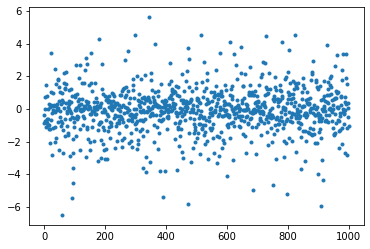

In [40]:
values_LD=get_values(n,LD)
plt.plot([i for i in range(n)],values_LD,'.')

https://homepage.divms.uiowa.edu/~mbognar/applets/exp-like.html

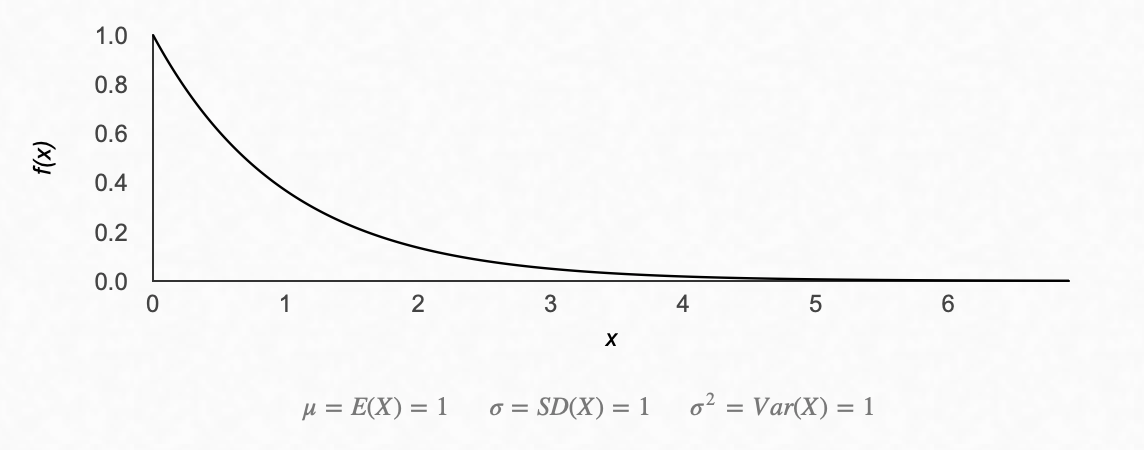

# Несмещенные оценки

In [41]:
sample_mean=sum(values_LD)/n
sample_mean

-0.08848791276086078

In [42]:
sample_cov=sum([math.pow(value-sample_mean,2) for value in values_LD])/n
sample_cov

1.9955602370822758

# Точные оценки

In [43]:
me=0
me

0

In [44]:
var=2/a**2
var

2.0

# Критерии согласия

In [45]:
a_min=-4
a_plus=4

## Колмогорова

In [46]:
delta=1.36
a=1

In [47]:
def teor_prob_func(x):
    return a/2*math.exp(-abs(x))

def teor_dist_func(x):
    return integrate.quad(lambda t: teor_prob_func(t), -np.inf, x)[0]

In [48]:
kolm_check_hypothesis(delta,kolm_dist(values_LD)*math.sqrt(n))

Dn*sqrt(n): 0.8261445446542796, Delta: 1.36


True

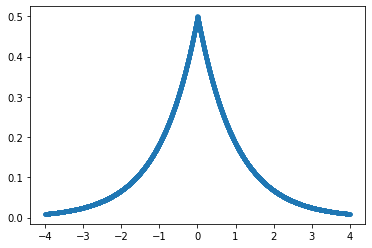

In [49]:
plt.plot([i/n for i in range(a_min*n,a_plus*n)],[teor_prob_func(i/n) for i in range(a_min*n,a_plus*n)],'.')

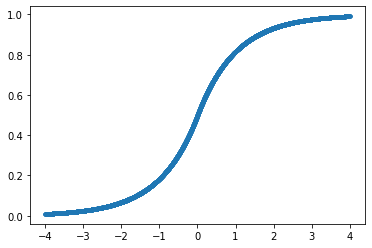

In [50]:
plt.plot([i/n for i in range(a_min*n,a_plus*n)],[teor_dist_func(i/n) for i in range(a_min*n,a_plus*n)],'.')

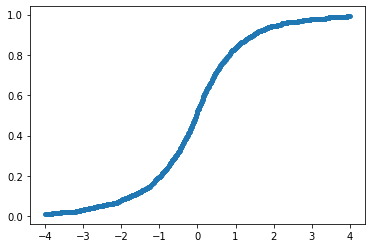

In [51]:
plt.plot([i/n for i in range(a_min*n,a_plus*n)],[emp_dist_func(i/n,values_LD) for i in range(a_min*n,a_plus*n)],'.')

# Покажем, что ошибка первого рода стремится к 0

In [52]:
t=1000

In [53]:
sum_fail_bd=0
for i in range(t):
    values=get_values(n,LD)
    if(kolm_check_hypothesis(delta,kolm_dist(values)*math.sqrt(n))==False):
        sum_fail_bd+=1

Dn*sqrt(n): 0.07898586070601837, Delta: 1.36
Dn*sqrt(n): 0.3261067961863581, Delta: 1.36
Dn*sqrt(n): 0.42486577765970274, Delta: 1.36
Dn*sqrt(n): 0.4308479836961595, Delta: 1.36
Dn*sqrt(n): 0.12649110640673178, Delta: 1.36
Dn*sqrt(n): 0.3162277660168347, Delta: 1.36
Dn*sqrt(n): 0.06324555320337115, Delta: 1.36
Dn*sqrt(n): 0.5355830025977922, Delta: 1.36
Dn*sqrt(n): 0.8772933421775164, Delta: 1.36
Dn*sqrt(n): 0.09289178273582614, Delta: 1.36
Dn*sqrt(n): 0.30822533999982726, Delta: 1.36
Dn*sqrt(n): 0.30830429294515205, Delta: 1.36
Dn*sqrt(n): 0.19764433051350522, Delta: 1.36
Dn*sqrt(n): 0.35971353190905697, Delta: 1.36
Dn*sqrt(n): 0.40703219838500826, Delta: 1.36
Dn*sqrt(n): 0.04546379592779025, Delta: 1.36
Dn*sqrt(n): 0.08893794731501506, Delta: 1.36
Dn*sqrt(n): 0.5592378978485455, Delta: 1.36
Dn*sqrt(n): 0.28065164819288085, Delta: 1.36
Dn*sqrt(n): 0.21345176530838447, Delta: 1.36
Dn*sqrt(n): 0.26675191119156616, Delta: 1.36
Dn*sqrt(n): 1.3458673048752405, Delta: 1.36
Dn*sqrt(n): 0.274

Dn*sqrt(n): 0.37551997799793235, Delta: 1.36
Dn*sqrt(n): 0.5533275097312756, Delta: 1.36
Dn*sqrt(n): 1.0099157416970634, Delta: 1.36
Dn*sqrt(n): 0.26286741930674057, Delta: 1.36
Dn*sqrt(n): 0.36762713579022693, Delta: 1.36
Dn*sqrt(n): 0.49993140397048025, Delta: 1.36
Dn*sqrt(n): 0.873495790116152, Delta: 1.36
Dn*sqrt(n): 0.6324555320336799, Delta: 1.36
Dn*sqrt(n): 0.9447299568282411, Delta: 1.36
Dn*sqrt(n): 0.5237422355722927, Delta: 1.36
Dn*sqrt(n): 0.08302214637507252, Delta: 1.36
Dn*sqrt(n): 0.11462021767932129, Delta: 1.36
Dn*sqrt(n): 0.4630515609610826, Delta: 1.36
Dn*sqrt(n): 0.4822493199286596, Delta: 1.36
Dn*sqrt(n): 0.1699126918194258, Delta: 1.36
Dn*sqrt(n): 0.5810087876413155, Delta: 1.36
Dn*sqrt(n): 0.15416054178614558, Delta: 1.36
Dn*sqrt(n): 0.35772957278804196, Delta: 1.36
Dn*sqrt(n): 0.9486832980505181, Delta: 1.36
Dn*sqrt(n): 0.03359932367090914, Delta: 1.36
Dn*sqrt(n): 0.7411648811648343, Delta: 1.36
Dn*sqrt(n): 0.3813154034513872, Delta: 1.36
Dn*sqrt(n): 0.1936495144

Dn*sqrt(n): 0.5988562083627673, Delta: 1.36
Dn*sqrt(n): 0.3458739955492967, Delta: 1.36
Dn*sqrt(n): 0.1857833183878294, Delta: 1.36
Dn*sqrt(n): 0.45259790259309346, Delta: 1.36
Dn*sqrt(n): 0.22531277743406025, Delta: 1.36
Dn*sqrt(n): 0.0789858613547695, Delta: 1.36
Dn*sqrt(n): 0.06124135357253487, Delta: 1.36
Dn*sqrt(n): 0.1620672242306926, Delta: 1.36
Dn*sqrt(n): 1.2332566857603815, Delta: 1.36
Dn*sqrt(n): 0.5415395552391251, Delta: 1.36
Dn*sqrt(n): 0.21743081445428655, Delta: 1.36
Dn*sqrt(n): 0.45259790259309346, Delta: 1.36
Dn*sqrt(n): 0.14603782519782793, Delta: 1.36
Dn*sqrt(n): 1.2708414465573874, Delta: 1.36
Dn*sqrt(n): 0.2943182597710167, Delta: 1.36
Dn*sqrt(n): 0.8141893966428718, Delta: 1.36
Dn*sqrt(n): 0.5315541712685642, Delta: 1.36
Dn*sqrt(n): 0.6087404263353948, Delta: 1.36
Dn*sqrt(n): 0.035575129612184, Delta: 1.36
Dn*sqrt(n): 0.312299144259338, Delta: 1.36
Dn*sqrt(n): 0.7431273470799933, Delta: 1.36
Dn*sqrt(n): 0.8597453507354995, Delta: 1.36
Dn*sqrt(n): 0.52967953132522

Dn*sqrt(n): 0.1896103352031107, Delta: 1.36
Dn*sqrt(n): 0.12652275027573373, Delta: 1.36
Dn*sqrt(n): 0.5236751132314629, Delta: 1.36
Dn*sqrt(n): 0.17786577088268893, Delta: 1.36
Dn*sqrt(n): 0.07707446693453282, Delta: 1.36
Dn*sqrt(n): 0.04348576589221877, Delta: 1.36
Dn*sqrt(n): 0.5434719150672597, Delta: 1.36
Dn*sqrt(n): 0.116180048162069, Delta: 1.36
Dn*sqrt(n): 0.266823232139577, Delta: 1.36
Dn*sqrt(n): 0.14026080478483086, Delta: 1.36
Dn*sqrt(n): 0.7194359643973854, Delta: 1.36
Dn*sqrt(n): 0.31019474436037736, Delta: 1.36
Dn*sqrt(n): 0.99808388459755, Delta: 1.36
Dn*sqrt(n): 0.7708096277309466, Delta: 1.36
Dn*sqrt(n): 0.335979653891108, Delta: 1.36
Dn*sqrt(n): 0.06324555320337115, Delta: 1.36
Dn*sqrt(n): 0.6737915789912226, Delta: 1.36
Dn*sqrt(n): 0.41686125385845657, Delta: 1.36
Dn*sqrt(n): 0.8694290382905954, Delta: 1.36
Dn*sqrt(n): 0.6680316498576337, Delta: 1.36
Dn*sqrt(n): 0.6047860966542661, Delta: 1.36
Dn*sqrt(n): 0.6561904111940178, Delta: 1.36
Dn*sqrt(n): 0.088959946478262

Dn*sqrt(n): 0.808367236277874, Delta: 1.36
Dn*sqrt(n): 0.4941182421969622, Delta: 1.36
Dn*sqrt(n): 0.4742153246182651, Delta: 1.36
Dn*sqrt(n): 0.07114927125961165, Delta: 1.36
Dn*sqrt(n): 1.0790872593054508, Delta: 1.36
Dn*sqrt(n): 0.5395993502167151, Delta: 1.36
Dn*sqrt(n): 1.094950997628953, Delta: 1.36
Dn*sqrt(n): 0.2905353719051908, Delta: 1.36
Dn*sqrt(n): 0.8001053117239656, Delta: 1.36
Dn*sqrt(n): 0.1501110880075116, Delta: 1.36
Dn*sqrt(n): 0.023715105698281537, Delta: 1.36
Dn*sqrt(n): 0.6304789849644511, Delta: 1.36
Dn*sqrt(n): 0.3478505426185185, Delta: 1.36
Dn*sqrt(n): 0.12649110640673178, Delta: 1.36
Dn*sqrt(n): 0.16009018302470285, Delta: 1.36
Dn*sqrt(n): 0.13044345941723548, Delta: 1.36
Dn*sqrt(n): 0.44469541949279884, Delta: 1.36
Dn*sqrt(n): 0.7293004089079532, Delta: 1.36
Dn*sqrt(n): 0.8043983287732607, Delta: 1.36
Dn*sqrt(n): 0.3992252070944757, Delta: 1.36
Dn*sqrt(n): 0.033599076617967565, Delta: 1.36
Dn*sqrt(n): 0.19566481862363527, Delta: 1.36
Dn*sqrt(n): 0.2233357362

Dn*sqrt(n): 0.4150089506700923, Delta: 1.36
Dn*sqrt(n): 0.4486470314371058, Delta: 1.36
Dn*sqrt(n): 0.6363683865323071, Delta: 1.36
Dn*sqrt(n): 0.48422685551852734, Delta: 1.36
Dn*sqrt(n): 0.22728981870182313, Delta: 1.36
Dn*sqrt(n): 0.5533906874698904, Delta: 1.36
Dn*sqrt(n): 0.5376188460976233, Delta: 1.36
Dn*sqrt(n): 0.38338617406840847, Delta: 1.36
Dn*sqrt(n): 0.7174268042959173, Delta: 1.36
Dn*sqrt(n): 1.523823659370858, Delta: 1.36
Dn*sqrt(n): 0.3459019299159695, Delta: 1.36
Dn*sqrt(n): 0.45259790259309346, Delta: 1.36
Dn*sqrt(n): 0.1343948244629793, Delta: 1.36
Dn*sqrt(n): 0.8912159157722401, Delta: 1.36
Dn*sqrt(n): 0.28855734242565456, Delta: 1.36
Dn*sqrt(n): 0.15022598556707664, Delta: 1.36
Dn*sqrt(n): 0.3794733192202094, Delta: 1.36
Dn*sqrt(n): 0.7964541272130082, Delta: 1.36
Dn*sqrt(n): 0.24301014554973782, Delta: 1.36
Dn*sqrt(n): 0.8558271162335533, Delta: 1.36


In [54]:
sum_fail_bd/t

0.008

# Хи-квадрат Пирсона

https://ru.wikipedia.org/wiki/Квантили_распределения_хи-квадрат

In [55]:
l=4
G=9.4877

In [56]:
sum_fail_bd=0
for i in range(t):
    values=get_values(n,LD)
    if(chi_check_hypothesis(G,get_chi_squared(a_min,a_plus,values,l))==False):
        sum_fail_bd+=1

X^2: 0.23444483587302747, G-1: 9.4877
X^2: 2.830728984083125, G-1: 9.4877
X^2: 2.982707022791687, G-1: 9.4877
X^2: 1.908683128364017, G-1: 9.4877
X^2: 1.457045405223624, G-1: 9.4877
X^2: 0.6295610849016935, G-1: 9.4877
X^2: 2.5840773834178856, G-1: 9.4877
X^2: 1.139091086085496, G-1: 9.4877
X^2: 4.035690431447985, G-1: 9.4877
X^2: 1.3888447745749573, G-1: 9.4877
X^2: 2.4656952223598188, G-1: 9.4877
X^2: 1.2954472240528858, G-1: 9.4877
X^2: 3.0077210011228224, G-1: 9.4877
X^2: 2.843148588016345, G-1: 9.4877
X^2: 2.868938883997275, G-1: 9.4877
X^2: 3.589833640182285, G-1: 9.4877
X^2: 3.126655270784882, G-1: 9.4877
X^2: 7.171545476219067, G-1: 9.4877
X^2: 4.45191193303765, G-1: 9.4877
X^2: 0.044641233965587834, G-1: 9.4877
X^2: 1.3129428790798456, G-1: 9.4877
X^2: 5.892698622031933, G-1: 9.4877
X^2: 3.6678335630007903, G-1: 9.4877
X^2: 2.843148588009612, G-1: 9.4877
X^2: 0.6879779382262422, G-1: 9.4877
X^2: 1.00662785283298, G-1: 9.4877
X^2: 0.46555953358500485, G-1: 9.4877
X^2: 0.8212772

X^2: 1.794132939423294, G-1: 9.4877
X^2: 1.2506357188100239, G-1: 9.4877
X^2: 4.788161829430388, G-1: 9.4877
X^2: 1.4953776716147247, G-1: 9.4877
X^2: 0.84814883588626, G-1: 9.4877
X^2: 2.384671334444299, G-1: 9.4877
X^2: 0.8372832105676173, G-1: 9.4877
X^2: 1.4677708226936224, G-1: 9.4877
X^2: 1.643860035269403, G-1: 9.4877
X^2: 2.622463509166495, G-1: 9.4877
X^2: 4.309985770184996, G-1: 9.4877
X^2: 6.130904856400019, G-1: 9.4877
X^2: 0.860917940093674, G-1: 9.4877
X^2: 3.8523812289769044, G-1: 9.4877
X^2: 0.7179098022953325, G-1: 9.4877
X^2: 0.22129442501097318, G-1: 9.4877
X^2: 1.4992011590594736, G-1: 9.4877
X^2: 1.6202224772270852, G-1: 9.4877
X^2: 0.4369326073164037, G-1: 9.4877
X^2: 5.557404675084335, G-1: 9.4877
X^2: 4.3760855648925885, G-1: 9.4877
X^2: 0.15336742296960454, G-1: 9.4877
X^2: 1.3415519639759148, G-1: 9.4877
X^2: 1.534270404320088, G-1: 9.4877
X^2: 1.4753023550941378, G-1: 9.4877
X^2: 0.3320569669252913, G-1: 9.4877
X^2: 0.46532204904436375, G-1: 9.4877
X^2: 1.639

X^2: 3.7931881741262936, G-1: 9.4877
X^2: 0.8318545568699421, G-1: 9.4877
X^2: 1.5314803849694312, G-1: 9.4877
X^2: 2.6277358319865813, G-1: 9.4877
X^2: 1.5768843852119767, G-1: 9.4877
X^2: 0.07129640648358368, G-1: 9.4877
X^2: 6.441600045443745, G-1: 9.4877
X^2: 9.172477828097657, G-1: 9.4877
X^2: 0.4235741303232974, G-1: 9.4877
X^2: 5.4177415276721215, G-1: 9.4877
X^2: 2.2326505719927443, G-1: 9.4877
X^2: 0.302237129416268, G-1: 9.4877
X^2: 0.05201660224267122, G-1: 9.4877
X^2: 1.0767388863755953, G-1: 9.4877
X^2: 2.2017321652386235, G-1: 9.4877
X^2: 2.8063923432728157, G-1: 9.4877
X^2: 5.363654160578807, G-1: 9.4877
X^2: 1.0233983272306455, G-1: 9.4877
X^2: 0.16578157815721223, G-1: 9.4877
X^2: 0.49075190659975143, G-1: 9.4877
X^2: 7.935456032150968, G-1: 9.4877
X^2: 0.6500856070216273, G-1: 9.4877
X^2: 1.9826070256804393, G-1: 9.4877
X^2: 1.9607256023190913, G-1: 9.4877
X^2: 0.37670451288437673, G-1: 9.4877
X^2: 1.6495349220316757, G-1: 9.4877
X^2: 4.577085361626179, G-1: 9.4877
X^

X^2: 0.3829437432078923, G-1: 9.4877
X^2: 1.4754882006172974, G-1: 9.4877
X^2: 0.12339848223196487, G-1: 9.4877
X^2: 4.516050355450565, G-1: 9.4877
X^2: 1.4609943506452314, G-1: 9.4877
X^2: 0.44509931692239557, G-1: 9.4877
X^2: 3.280265400008874, G-1: 9.4877
X^2: 4.018221229417126, G-1: 9.4877
X^2: 5.287028990319007, G-1: 9.4877
X^2: 8.468047691557887, G-1: 9.4877
X^2: 1.6561995450801767, G-1: 9.4877
X^2: 2.4502118443954837, G-1: 9.4877
X^2: 1.6504520249898935, G-1: 9.4877
X^2: 6.78513790207002, G-1: 9.4877
X^2: 9.348788244528798, G-1: 9.4877
X^2: 10.574887211258094, G-1: 9.4877
X^2: 1.048901279436182, G-1: 9.4877
X^2: 0.1521058270366873, G-1: 9.4877
X^2: 7.917262435243963, G-1: 9.4877
X^2: 0.2060640157146591, G-1: 9.4877
X^2: 2.450332461812233, G-1: 9.4877
X^2: 3.6451767853123034, G-1: 9.4877
X^2: 1.8117214918956441, G-1: 9.4877
X^2: 1.3103077975517325, G-1: 9.4877
X^2: 0.016971797929232167, G-1: 9.4877
X^2: 3.6668987348057986, G-1: 9.4877
X^2: 4.131639010795231, G-1: 9.4877
X^2: 1.78

In [57]:
sum_fail_bd/t

0.005

# Exponential distribution

In [58]:
a=4

In [59]:
def random_ED(MCG,a):
    while True:
        mcg=get_values(1,MCG)[0]
        yield -1/a*math.log(mcg)

In [60]:
ED=random_ED(MCG2,a)

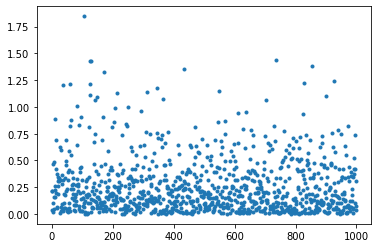

In [61]:
values_ED=get_values(n,ED)
plt.plot([i for i in range(n)],values_ED,'.')

https://homepage.divms.uiowa.edu/~mbognar/applets/exp-like.html

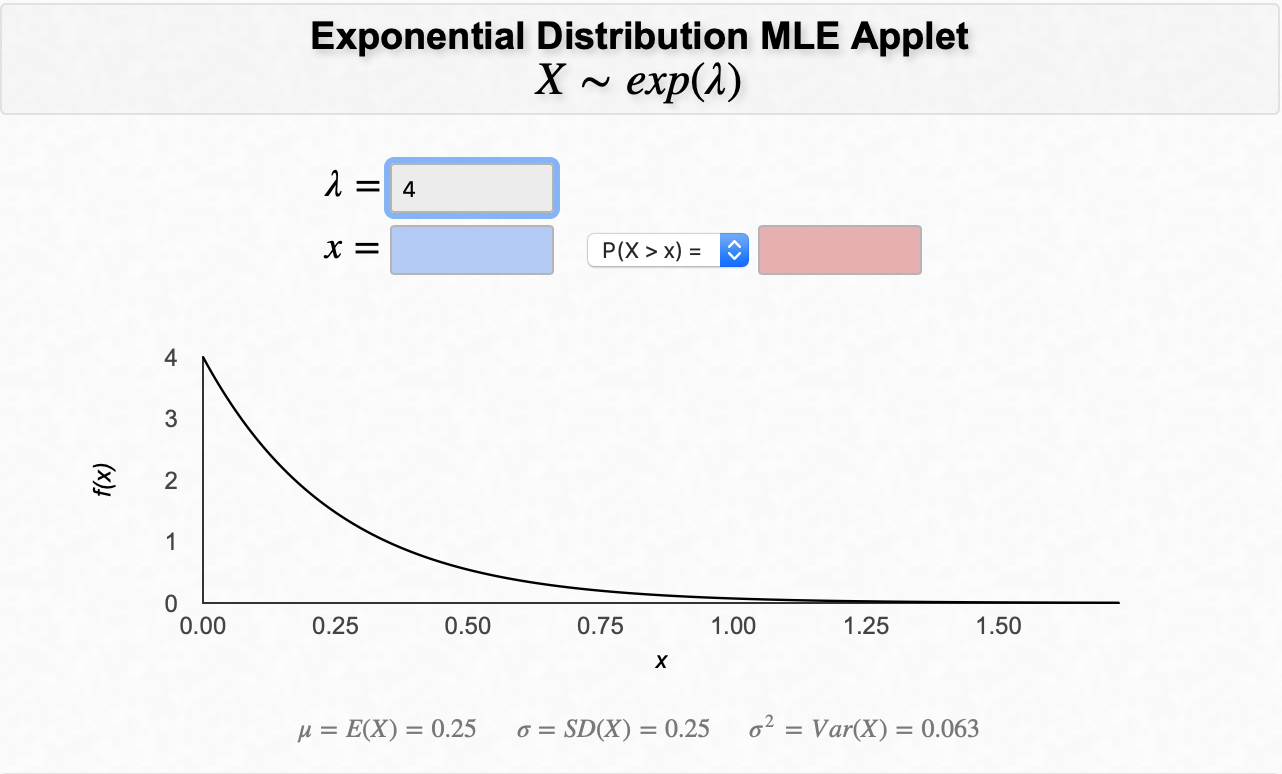

# Несмещенные оценки

In [62]:
sample_mean=sum(values_ED)/n
sample_mean

0.25516929957243967

In [63]:
sample_cov=sum([math.pow(value-sample_mean,2) for value in values_ED])/n
sample_cov

0.0672632450997558

# Критерии согласия

In [64]:
a_min=0
a_plus=1

## Колмогорова

In [65]:
delta=1.36
a=4

In [66]:
def teor_prob_func(x):
    return a*math.exp(-a*x)

def teor_dist_func(x):
    return 1-math.exp(-a*x)

In [67]:
kolm_check_hypothesis(delta,kolm_dist(values_ED)*math.sqrt(n))

Dn*sqrt(n): 0.04724070116934581, Delta: 1.36


True

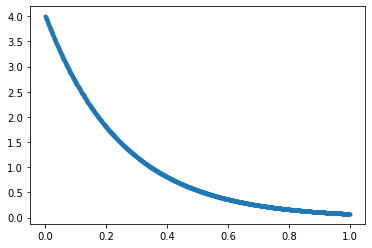

In [68]:
plt.plot([i/n for i in range(a_min*n,a_plus*n)],[teor_prob_func(i/n) for i in range(a_min*n,a_plus*n)],'.')

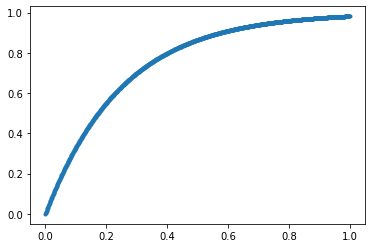

In [69]:
plt.plot([i/n for i in range(a_min*n,a_plus*n)],[teor_dist_func(i/n) for i in range(a_min*n,a_plus*n)],'.')

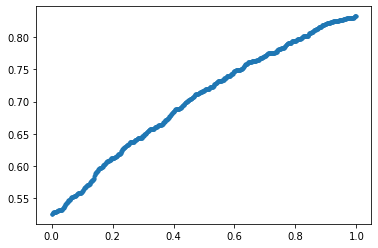

In [70]:
plt.plot([i/n for i in range(a_min*n,a_plus*n)],[emp_dist_func(i/n,values_LD) for i in range(a_min*n,a_plus*n)],'.')

# Покажем, что ошибка первого рода стремится к 0

In [71]:
t=1000

In [72]:
sum_fail_bd=0
for i in range(t):
    values=get_values(n,ED)
    if(kolm_check_hypothesis(delta,kolm_dist(values)*math.sqrt(n))==False):
        sum_fail_bd+=1

Dn*sqrt(n): 0.19555269024800623, Delta: 1.36
Dn*sqrt(n): 0.04560982278369432, Delta: 1.36
Dn*sqrt(n): 0.05141689168730478, Delta: 1.36
Dn*sqrt(n): 0.03944848559894176, Delta: 1.36
Dn*sqrt(n): 0.05138923517630637, Delta: 1.36
Dn*sqrt(n): 0.04339220227894969, Delta: 1.36
Dn*sqrt(n): 0.047398607059991854, Delta: 1.36
Dn*sqrt(n): 0.05936405388151354, Delta: 1.36
Dn*sqrt(n): 0.03555561989069972, Delta: 1.36
Dn*sqrt(n): 0.08309890412778549, Delta: 1.36
Dn*sqrt(n): 0.047398607059991854, Delta: 1.36
Dn*sqrt(n): 0.0788634777710296, Delta: 1.36
Dn*sqrt(n): 0.1646708769432059, Delta: 1.36
Dn*sqrt(n): 0.20858394305452715, Delta: 1.36
Dn*sqrt(n): 0.055220394962762806, Delta: 1.36
Dn*sqrt(n): 0.12230114782197551, Delta: 1.36
Dn*sqrt(n): 0.07873724062221871, Delta: 1.36
Dn*sqrt(n): 0.04348749286433822, Delta: 1.36
Dn*sqrt(n): 0.0434514381177466, Delta: 1.36
Dn*sqrt(n): 0.03558772574103723, Delta: 1.36
Dn*sqrt(n): 0.18523913975843306, Delta: 1.36
Dn*sqrt(n): 0.07107126220062555, Delta: 1.36
Dn*sqrt(n)

Dn*sqrt(n): 0.0788634777710296, Delta: 1.36
Dn*sqrt(n): 0.12295284677144111, Delta: 1.36
Dn*sqrt(n): 0.07895820262686756, Delta: 1.36
Dn*sqrt(n): 0.03148061630280728, Delta: 1.36
Dn*sqrt(n): 0.09067837122029172, Delta: 1.36
Dn*sqrt(n): 0.07521294950748307, Delta: 1.36
Dn*sqrt(n): 0.15103727013255078, Delta: 1.36
Dn*sqrt(n): 0.1021576763260341, Delta: 1.36
Dn*sqrt(n): 0.2785814470858781, Delta: 1.36
Dn*sqrt(n): 0.12295284677144111, Delta: 1.36
Dn*sqrt(n): 0.06692972917424467, Delta: 1.36
Dn*sqrt(n): 0.12230114782197551, Delta: 1.36
Dn*sqrt(n): 0.06712705252522164, Delta: 1.36
Dn*sqrt(n): 0.3967827891740944, Delta: 1.36
Dn*sqrt(n): 0.34820445504254305, Delta: 1.36
Dn*sqrt(n): 0.10313020422875163, Delta: 1.36
Dn*sqrt(n): 0.03160697048252741, Delta: 1.36
Dn*sqrt(n): 0.039750540725892354, Delta: 1.36
Dn*sqrt(n): 0.047438117090876045, Delta: 1.36
Dn*sqrt(n): 0.23342549813190433, Delta: 1.36
Dn*sqrt(n): 0.04348749286433822, Delta: 1.36
Dn*sqrt(n): 0.04339220227894969, Delta: 1.36
Dn*sqrt(n): 

Dn*sqrt(n): 0.0592371539417021, Delta: 1.36
Dn*sqrt(n): 0.07492419527758952, Delta: 1.36
Dn*sqrt(n): 0.055220394962762806, Delta: 1.36
Dn*sqrt(n): 0.0592371539417021, Delta: 1.36
Dn*sqrt(n): 0.1586819562728748, Delta: 1.36
Dn*sqrt(n): 0.0950104901039279, Delta: 1.36
Dn*sqrt(n): 0.07514582376977791, Delta: 1.36
Dn*sqrt(n): 0.09493153321562642, Delta: 1.36
Dn*sqrt(n): 0.13142193771707547, Delta: 1.36
Dn*sqrt(n): 0.06712705252522164, Delta: 1.36
Dn*sqrt(n): 0.04348749286433822, Delta: 1.36
Dn*sqrt(n): 0.06330875661394263, Delta: 1.36
Dn*sqrt(n): 0.06318234979279255, Delta: 1.36
Dn*sqrt(n): 0.04339220227894969, Delta: 1.36
Dn*sqrt(n): 0.055291464910307085, Delta: 1.36
Dn*sqrt(n): 0.11313998574340678, Delta: 1.36
Dn*sqrt(n): 0.1706648659627012, Delta: 1.36
Dn*sqrt(n): 0.11099941898788404, Delta: 1.36
Dn*sqrt(n): 0.05141689168730478, Delta: 1.36
Dn*sqrt(n): 0.142401233584919, Delta: 1.36
Dn*sqrt(n): 0.06660643537599906, Delta: 1.36
Dn*sqrt(n): 0.05134528263695726, Delta: 1.36
Dn*sqrt(n): 0.1

Dn*sqrt(n): 0.2747845584493677, Delta: 1.36
Dn*sqrt(n): 0.11481246433251324, Delta: 1.36
Dn*sqrt(n): 0.03570618952773793, Delta: 1.36
Dn*sqrt(n): 0.047438117090876045, Delta: 1.36
Dn*sqrt(n): 0.059292953170807114, Delta: 1.36
Dn*sqrt(n): 0.031559573191108754, Delta: 1.36
Dn*sqrt(n): 0.1186101072598793, Delta: 1.36
Dn*sqrt(n): 0.0434514381177466, Delta: 1.36
Dn*sqrt(n): 0.047398607059991854, Delta: 1.36
Dn*sqrt(n): 0.062472599786183906, Delta: 1.36
Dn*sqrt(n): 0.055291464910307085, Delta: 1.36
Dn*sqrt(n): 0.1277679953210848, Delta: 1.36
Dn*sqrt(n): 0.047335426025183765, Delta: 1.36
Dn*sqrt(n): 0.06712705252522164, Delta: 1.36
Dn*sqrt(n): 0.10764382296231073, Delta: 1.36
Dn*sqrt(n): 0.03160697048252741, Delta: 1.36
Dn*sqrt(n): 0.07895820262686756, Delta: 1.36
Dn*sqrt(n): 0.03555561989069972, Delta: 1.36
Dn*sqrt(n): 0.17424497219125162, Delta: 1.36
Dn*sqrt(n): 0.0434514381177466, Delta: 1.36
Dn*sqrt(n): 0.06692972917424467, Delta: 1.36
Dn*sqrt(n): 0.0868431715644466, Delta: 1.36
Dn*sqrt(n

Dn*sqrt(n): 0.1612659580367097, Delta: 1.36
Dn*sqrt(n): 0.0434514381177466, Delta: 1.36
Dn*sqrt(n): 0.36872070910754967, Delta: 1.36
Dn*sqrt(n): 0.09941203691589351, Delta: 1.36
Dn*sqrt(n): 0.05916214027731345, Delta: 1.36
Dn*sqrt(n): 0.03563117586334928, Delta: 1.36
Dn*sqrt(n): 0.03555561989069972, Delta: 1.36
Dn*sqrt(n): 0.0829009335009359, Delta: 1.36
Dn*sqrt(n): 0.055291464910307085, Delta: 1.36
Dn*sqrt(n): 0.10282241809811188, Delta: 1.36
Dn*sqrt(n): 0.18226600519722247, Delta: 1.36
Dn*sqrt(n): 0.07119964149642809, Delta: 1.36
Dn*sqrt(n): 0.03558772574103723, Delta: 1.36
Dn*sqrt(n): 0.03950377574853965, Delta: 1.36
Dn*sqrt(n): 0.0829009335009359, Delta: 1.36
Dn*sqrt(n): 0.28588187832950374, Delta: 1.36
Dn*sqrt(n): 0.055291464910307085, Delta: 1.36
Dn*sqrt(n): 0.10078037829850818, Delta: 1.36
Dn*sqrt(n): 0.1806239291310714, Delta: 1.36
Dn*sqrt(n): 0.08698733065819551, Delta: 1.36
Dn*sqrt(n): 0.06285092648100522, Delta: 1.36
Dn*sqrt(n): 0.05970729356807355, Delta: 1.36
Dn*sqrt(n): 0

Dn*sqrt(n): 0.0512781568992521, Delta: 1.36
Dn*sqrt(n): 0.15888683642560264, Delta: 1.36
Dn*sqrt(n): 0.055291464910307085, Delta: 1.36
Dn*sqrt(n): 0.03909343101456404, Delta: 1.36
Dn*sqrt(n): 0.04348749286433822, Delta: 1.36
Dn*sqrt(n): 0.03563117586334928, Delta: 1.36
Dn*sqrt(n): 0.03950377574853965, Delta: 1.36
Dn*sqrt(n): 0.07071620761624783, Delta: 1.36
Dn*sqrt(n): 0.0986669295075665, Delta: 1.36
Dn*sqrt(n): 0.0986669295075665, Delta: 1.36
Dn*sqrt(n): 0.13884899312880533, Delta: 1.36
Dn*sqrt(n): 0.03558772574103723, Delta: 1.36
Dn*sqrt(n): 0.31976760707736923, Delta: 1.36
Dn*sqrt(n): 0.07544178909367415, Delta: 1.36
Dn*sqrt(n): 0.06318234979279255, Delta: 1.36
Dn*sqrt(n): 0.06318234979279255, Delta: 1.36
Dn*sqrt(n): 0.1457559962863488, Delta: 1.36
Dn*sqrt(n): 0.04348749286433822, Delta: 1.36
Dn*sqrt(n): 0.047438117090876045, Delta: 1.36
Dn*sqrt(n): 0.4025478866862788, Delta: 1.36
Dn*sqrt(n): 0.05134528263695726, Delta: 1.36
Dn*sqrt(n): 0.031685980012258835, Delta: 1.36
Dn*sqrt(n): 

In [73]:
sum_fail_bd/t

0.0

# Хи-квадрат Пирсона

https://ru.wikipedia.org/wiki/Квантили_распределения_хи-квадрат

In [74]:
l=4
G=9.4877

In [75]:
sum_fail_bd=0
for i in range(t):
    values=get_values(n,ED)
    if(chi_check_hypothesis(G,get_chi_squared(a_min,a_plus,values,l))==False):
        sum_fail_bd+=1

X^2: 1.0405008515853724, G-1: 9.4877
X^2: 9.019528238788007, G-1: 9.4877
X^2: 2.8557054929437253, G-1: 9.4877
X^2: 2.3480241516661695, G-1: 9.4877
X^2: 3.9511251923259127, G-1: 9.4877
X^2: 0.052559296149797374, G-1: 9.4877
X^2: 4.8759724669670685, G-1: 9.4877
X^2: 2.1921711207797108, G-1: 9.4877
X^2: 1.3751623909513662, G-1: 9.4877
X^2: 3.138924651310749, G-1: 9.4877
X^2: 0.9549103752298509, G-1: 9.4877
X^2: 0.9160984870306662, G-1: 9.4877
X^2: 2.0013127046046275, G-1: 9.4877
X^2: 2.439314907461214, G-1: 9.4877
X^2: 0.6593737720734162, G-1: 9.4877
X^2: 5.378900721116307, G-1: 9.4877
X^2: 4.602628354515538, G-1: 9.4877
X^2: 0.1395814735402119, G-1: 9.4877
X^2: 1.3480943730778763, G-1: 9.4877
X^2: 2.7586344663830595, G-1: 9.4877
X^2: 0.3491404416259205, G-1: 9.4877
X^2: 1.2992001634303694, G-1: 9.4877
X^2: 1.0334100597235523, G-1: 9.4877
X^2: 3.313394503953477, G-1: 9.4877
X^2: 2.265314099356089, G-1: 9.4877
X^2: 3.490949403758518, G-1: 9.4877
X^2: 1.1191124636291563, G-1: 9.4877
X^2: 1.

X^2: 3.4712916861173606, G-1: 9.4877
X^2: 2.0456911245707525, G-1: 9.4877
X^2: 0.819931002346201, G-1: 9.4877
X^2: 4.5126932317910144, G-1: 9.4877
X^2: 1.2703119525194755, G-1: 9.4877
X^2: 0.4890708007822309, G-1: 9.4877
X^2: 2.0360548729733985, G-1: 9.4877
X^2: 1.1684270122059588, G-1: 9.4877
X^2: 0.2658994284138719, G-1: 9.4877
X^2: 1.9777130633386335, G-1: 9.4877
X^2: 2.449683854727169, G-1: 9.4877
X^2: 0.503236049021257, G-1: 9.4877
X^2: 0.5591440275356241, G-1: 9.4877
X^2: 20.28911598936512, G-1: 9.4877
X^2: 0.8102143854386161, G-1: 9.4877
X^2: 0.7685368219027086, G-1: 9.4877
X^2: 2.41469536968703, G-1: 9.4877
X^2: 0.5441138149232699, G-1: 9.4877
X^2: 1.294305961560102, G-1: 9.4877
X^2: 1.3381858177811143, G-1: 9.4877
X^2: 2.385566496297636, G-1: 9.4877
X^2: 4.356125156309714, G-1: 9.4877
X^2: 0.7123841386486075, G-1: 9.4877
X^2: 0.679951558935293, G-1: 9.4877
X^2: 5.286373159983131, G-1: 9.4877
X^2: 1.226736608367207, G-1: 9.4877
X^2: 0.30182548069586024, G-1: 9.4877
X^2: 1.71694

X^2: 0.8472172472577416, G-1: 9.4877
X^2: 0.4954898000692526, G-1: 9.4877
X^2: 2.7434340708216682, G-1: 9.4877
X^2: 0.41154549203066465, G-1: 9.4877
X^2: 1.3995963933274054, G-1: 9.4877
X^2: 0.6882083217721977, G-1: 9.4877
X^2: 0.6065271799199652, G-1: 9.4877
X^2: 2.0937486216089876, G-1: 9.4877
X^2: 0.3307640374291304, G-1: 9.4877
X^2: 0.7002010862644927, G-1: 9.4877
X^2: 0.13661163910155621, G-1: 9.4877
X^2: 1.445089671543665, G-1: 9.4877
X^2: 5.2530239138635215, G-1: 9.4877
X^2: 0.055181842577540816, G-1: 9.4877
X^2: 9.890809264775676, G-1: 9.4877
X^2: 4.471166075184948, G-1: 9.4877
X^2: 4.081176787227723, G-1: 9.4877
X^2: 0.47135205518461576, G-1: 9.4877
X^2: 0.8695787424006036, G-1: 9.4877
X^2: 0.5860321846211051, G-1: 9.4877
X^2: 0.5268862506910281, G-1: 9.4877
X^2: 1.0133057445458549, G-1: 9.4877
X^2: 0.057076909102111606, G-1: 9.4877
X^2: 7.75099958478104, G-1: 9.4877
X^2: 1.0048270073428316, G-1: 9.4877
X^2: 5.783656103657699, G-1: 9.4877
X^2: 1.0989742871470243, G-1: 9.4877
X

X^2: 0.7084020165960434, G-1: 9.4877
X^2: 0.470382518271561, G-1: 9.4877
X^2: 2.919027232026744, G-1: 9.4877
X^2: 0.26072640119418644, G-1: 9.4877
X^2: 2.042401173957533, G-1: 9.4877
X^2: 1.0573246613194716, G-1: 9.4877
X^2: 0.2563526428019118, G-1: 9.4877
X^2: 0.009247258997031235, G-1: 9.4877
X^2: 0.6010906209650745, G-1: 9.4877
X^2: 0.8949285516890846, G-1: 9.4877
X^2: 0.9551781414936524, G-1: 9.4877
X^2: 0.20687802780251013, G-1: 9.4877
X^2: 3.6042286517596507, G-1: 9.4877
X^2: 4.408200033302995, G-1: 9.4877
X^2: 1.6061716865069182, G-1: 9.4877
X^2: 0.4011283550123954, G-1: 9.4877
X^2: 4.406707950367087, G-1: 9.4877
X^2: 4.33894135197216, G-1: 9.4877
X^2: 2.9148044257078314, G-1: 9.4877
X^2: 0.6082156212571467, G-1: 9.4877
X^2: 0.3240691207595135, G-1: 9.4877
X^2: 5.595228991355225, G-1: 9.4877
X^2: 2.1133773076405893, G-1: 9.4877
X^2: 1.593831723920358, G-1: 9.4877
X^2: 1.32131058330978, G-1: 9.4877
X^2: 5.9148850451176935, G-1: 9.4877
X^2: 7.053685427614633, G-1: 9.4877
X^2: 0.11

In [76]:
sum_fail_bd/t

0.015